## Guide for Nearest Class Multiple Centroids

- Author : Sangjun Han
- Date : 2018. 12. 11
- Compliance with NCMC v0.2
- Classification of Iris Plants Dataset using NCMC

In [1]:
import warnings
from time import time
from NCMC import NCMC

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')

### Load Iris Plants Dataset
Iris plants dataset provided from sklearn consists of 3 classes (setosa, versicolor, virginica), 4 features (sepal length, sepal width, petal length, petal width) with 150 data. We load the data and shuffle them to guarantee data bias.

In [2]:
def shuffleData(x, y):
    idx = np.arange(0, x.shape[0])
    np.random.shuffle(idx)
    
    return x[idx], y[idx]

In [3]:
# load iris data
data = load_iris()

x = data["data"]
y = data["target"]

# shuffle data
x, y = shuffleData(x, y)

print("x shape :", x.shape)
print("y shape :", y.shape)

x shape : (150, 4)
y shape : (150,)


Split the dataset into train, validation and test set. Normalize them according to the statistical properties of training set.

In [4]:
def splitData(x, y, train_ratio=0.6, val_ratio=0.2):
    num_data = x.shape[0]
    
    num_train = int(num_data * train_ratio)
    num_val = int(num_data * val_ratio)

    x_train = x[:num_train]
    y_train = y[:num_train]
    
    x_val = x[num_train:num_train+num_val]
    y_val = y[num_train:num_train+num_val]
    
    x_test = x[num_train+num_val:]
    y_test = y[num_train+num_val:]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [5]:
# split data
x_train, y_train, x_val, y_val, x_test, y_test = splitData(x, y)

print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_val shape :", x_val.shape)
print("y_val shape :", y_val.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (90, 4)
y_train shape : (90,)
x_val shape : (30, 4)
y_val shape : (30,)
x_test shape : (30, 4)
y_test shape : (30,)


### Train model

In [6]:
ncmc = NCMC()
history = ncmc.fit(x_train, y_train, x_val, y_val, semantic_dim=2, init=None, learning_rate=0.001, num_centroids=3,
                            reg=0, max_iters=100, batch_size=64, decay=0.8, num_decay=10, stop_tol=0.001, num_stop_tol=100)

Initializing mean-centroids for each class
0.10 sec for initializng

Start training
Epoch 1 (0.00 sec) - train_loss : 0.2302, train_acc : 0.9531, val_loss : 0.2105, val_acc : 0.9333
Epoch 2 (0.01 sec) - train_loss : 0.1990, train_acc : 0.9688, val_loss : 0.2104, val_acc : 0.9333
Epoch 3 (0.00 sec) - train_loss : 0.2095, train_acc : 0.9688, val_loss : 0.2104, val_acc : 0.9333
Epoch 4 (0.01 sec) - train_loss : 0.2542, train_acc : 0.9688, val_loss : 0.2104, val_acc : 0.9333
Epoch 5 (0.00 sec) - train_loss : 0.2352, train_acc : 0.9531, val_loss : 0.2104, val_acc : 0.9333
Epoch 6 (0.00 sec) - train_loss : 0.2119, train_acc : 0.9531, val_loss : 0.2103, val_acc : 0.9333
Epoch 7 (0.00 sec) - train_loss : 0.2192, train_acc : 0.9531, val_loss : 0.2103, val_acc : 0.9333
Epoch 8 (0.01 sec) - train_loss : 0.2260, train_acc : 0.9688, val_loss : 0.2103, val_acc : 0.9333
Epoch 9 (0.00 sec) - train_loss : 0.2037, train_acc : 0.9531, val_loss : 0.2102, val_acc : 0.9333
Epoch 10 (0.00 sec) - train_loss :

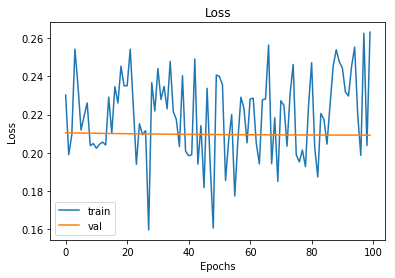

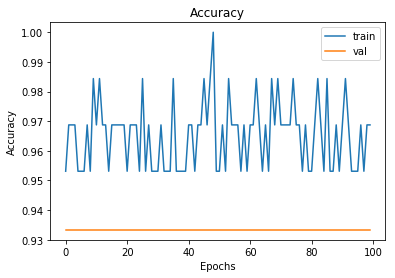

In [8]:
plt.plot(history["train_loss"])
plt.plot(history["val_loss"])
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

plt.plot(history["train_acc"])
plt.plot(history["val_acc"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

### Predict

In [9]:
# predict
loss, accuracy, y_pred = ncmc.predict(x_test, y_test)
print("Loss :", loss, ", Accuracy :", accuracy)

Loss : 0.1789741746163165 , Accuracy : 0.9666666666666667


### Others
Find best model using validation set. In this example, a few of semantic dimension and learning rate are inspected.

In [10]:
# 1. find best model
semantic_dim_list = [4, 3, 2, 1]
learning_rate_list = [0.01, 0.005, 0.001]
max_acc = 0

for sem in semantic_dim_list:
    for lr in learning_rate_list:
        print("Semantic dimension :", sem)
        print("Learning rate :", lr)
        
        ncmc = NCMC()
        history = ncmc.fit(x_train, y_train, x_val, y_val, semantic_dim=sem, init=None, learning_rate=lr, reg=0,
                           num_centroids=3, max_iters=50, batch_size=64, decay=0.8, num_decay=50, stop_tol=0.001, num_stop_tol=30)
        
        val_acc = history["val_acc"][-1]
        print("Accuracy :", accuracy)
        print("===================================================")
        print("\n")
        
        # find best model
        if max_acc < val_acc:
            final_sem = sem
            final_lr = lr
            max_acc = val_acc
            final_ncmc = ncmc
            final_history = history
            
print("Final semantic dimesion :", final_sem)
print("Final learning rate :", final_lr)
print("Final accuracy :", max_acc)

# final model
ncmc = final_ncmc
history = final_history

Semantic dimension : 4
Learning rate : 0.01
Initializing mean-centroids for each class
0.08 sec for initializng

Start training
Epoch 1 (0.00 sec) - train_loss : 0.2226, train_acc : 0.8906, val_loss : 0.2254, val_acc : 0.9000
Epoch 2 (0.00 sec) - train_loss : 0.1845, train_acc : 0.8906, val_loss : 0.2250, val_acc : 0.9000
Epoch 3 (0.01 sec) - train_loss : 0.2601, train_acc : 0.9062, val_loss : 0.2247, val_acc : 0.9000
Epoch 4 (0.00 sec) - train_loss : 0.2544, train_acc : 0.8750, val_loss : 0.2244, val_acc : 0.9000
Epoch 5 (0.00 sec) - train_loss : 0.2236, train_acc : 0.9219, val_loss : 0.2240, val_acc : 0.9000
Epoch 6 (0.00 sec) - train_loss : 0.2766, train_acc : 0.8750, val_loss : 0.2236, val_acc : 0.9000
Epoch 7 (0.01 sec) - train_loss : 0.2670, train_acc : 0.8750, val_loss : 0.2233, val_acc : 0.9000
Epoch 8 (0.00 sec) - train_loss : 0.2784, train_acc : 0.9062, val_loss : 0.2229, val_acc : 0.9000
Epoch 9 (0.01 sec) - train_loss : 0.2713, train_acc : 0.8750, val_loss : 0.2224, val_acc

You can get a similarity matrix (N, C) for a dataset.

In [11]:
dist = ncmc.getDist(x_test)
print(dist.shape)

(30, 9)


You can assign a new class to where its distance exceeds a threshold.

In [12]:
threshold = 0.9
new_class = 999
ncmc.setThreshold(threshold)
accuracy, dist, y_pred = ncmc.predictDist(x_test, y_test, new_class)
print("Accuracy :", accuracy)

Accuracy : 0.9666666666666667


You are now saving a trained model automatically. You can save and load your model as below.

In [13]:
ncmc.saveModel()

ncmc = NCMC()
ncmc.loadModel()